# C1 W3 Group 8 - Task 5

In [1]:
from tqdm import tqdm
from PIL import Image
import pickle
from src.background import get_painting_masks, crop_image_by_mask
from src.data import GT_QSD2_W3_LIST
from src.denoising import denoise_image
from src.paths import QSD2_W3_PATH, WEEK_3_RESULTS_PATH, BBDD_PATH, QST1_W3_PATH, QST2_W3_PATH
from src.retrieval import find_top_k_similar_images
from src.utils import show_images

In [2]:
query_t1_image_PIL_list = [Image.open(query_img_path) for query_img_path in sorted(QST1_W3_PATH.glob("*.jpg"))]  # Load once
query_t2_image_PIL_list = [Image.open(query_img_path) for query_img_path in sorted(QST2_W3_PATH.glob("*.jpg"))]  # Load once
database_image_PIL_list = [Image.open(db_img_path) for db_img_path in sorted(BBDD_PATH.glob("*.jpg"))]  # Load once

###  Denoising

In [3]:
# Apply median filter
query_t1_image_PIL_list = [denoise_image(image) for image in query_t1_image_PIL_list]
query_t2_image_PIL_list = [denoise_image(image) for image in query_t2_image_PIL_list]

### T1 : Retrieval

In [4]:
retrieved_images_t1 = find_top_k_similar_images(query_t1_image_PIL_list, database_image_PIL_list)

Processing level 5: 100%|██████████| 50/50 [00:07<00:00,  6.93it/s]


In [5]:
retrieved_images_t1 = [el[0] for el in retrieved_images_t1]
print(retrieved_images_t1)

method1_qst1_path = WEEK_3_RESULTS_PATH / "Task_4" / "m1_qst1.pkl"
with open(method1_qst1_path, 'wb') as f:
    pickle.dump(retrieved_images_t1, f)


[[90, 35, 278, 147, 116], [131, 93, 37, 110, 142], [212, 40, 258, 120, 116], [28, 59, 282, 158, 82], [136, 286, 150, 163, 84], [86, 3, 125, 27, 61], [113, 192, 103, 130, 160], [263, 267, 159, 40, 56], [128, 104, 32, 142, 279], [101, 248, 279, 91, 102], [203, 61, 144, 255, 161], [62, 231, 115, 133, 157], [35, 65, 236, 120, 40], [47, 36, 120, 189, 186], [183, 75, 258, 24, 209], [193, 265, 255, 12, 161], [202, 92, 258, 212, 42], [8, 155, 283, 161, 40], [219, 179, 155, 125, 129], [124, 82, 29, 41, 172], [189, 47, 52, 120, 177], [274, 35, 251, 47, 68], [200, 35, 205, 146, 150], [40, 106, 184, 161, 74], [258, 42, 150, 239, 39], [225, 104, 279, 88, 237], [146, 60, 68, 40, 35], [182, 100, 177, 120, 65], [91, 279, 101, 248, 102], [150, 95, 212, 258, 215], [218, 226, 81, 125, 155], [277, 167, 283, 60, 77], [286, 163, 90, 147, 116], [117, 192, 58, 160, 85], [280, 165, 278, 114, 5], [67, 141, 229, 38, 114], [199, 115, 173, 276, 226], [204, 250, 194, 97, 165], [258, 170, 176, 63, 42], [250, 164, 97

### T2 : Background removal

In [6]:
# Get painting masks for T2
painting_masks_list_t2 = []
pbar = tqdm(zip(sorted(QST2_W3_PATH.glob("*.jpg")), query_t2_image_PIL_list))
for name, image in pbar:
    pbar.set_description(f"Processing {name.stem}")
    painting_masks = get_painting_masks(image)    
    painting_masks_list_t2.append(painting_masks)

Processing 00029: : 30it [00:07,  3.97it/s]


In [7]:
cropped_query_image_list_t2 = []
pbar = tqdm(zip(sorted(QST2_W3_PATH.glob("*.jpg")), query_t2_image_PIL_list, painting_masks_list_t2))
for name, image, predicted_mask in pbar:
    pbar.set_description(f"Splitting {name.stem}")
    image_list = crop_image_by_mask(image, predicted_mask)
    cropped_query_image_list_t2.append(image_list)

Splitting 00029: : 30it [00:00, 71.81it/s]


### T2 : Retrieval

In [10]:
display(cropped_query_image_list_t2[0])

[<PIL.Image.Image image mode=RGB size=936x1297>]

In [8]:
retrieved_images_t2 = find_top_k_similar_images(cropped_query_image_list_t2, database_image_PIL_list)
print(retrieved_images_t2)
method1_qst2_path = WEEK_3_RESULTS_PATH / "Task_4" / "m1_qst2.pkl"
with open(method1_qst2_path, 'wb') as f:
    pickle.dump(retrieved_images_t2, f)

Processing level 5: 100%|██████████| 38/38 [00:07<00:00,  4.82it/s]


[[[286, 90, 163, 147, 150]], [[116, 40, 120, 35, 90]], [[23, 191, 94, 275, 58]], [[242, 142, 32, 104, 76]], [[210, 32, 198, 85, 265]], [[270, 47, 24, 36, 40]], [[76, 142, 273, 103, 110]], [[193, 265, 255, 12, 161]], [[210, 259, 32, 109, 198], [221, 35, 48, 165, 25]], [[160, 58, 192, 239, 117]], [[107, 30, 53, 74, 106]], [[101, 248, 102, 279, 91], [22, 202, 212, 40, 258]], [[157, 57, 46, 43, 103], [108, 164, 201, 184, 6]], [[174, 232, 101, 135, 248]], [[259, 160, 32, 192, 113]], [[204, 165, 36, 6, 250], [179, 219, 155, 129, 218]], [[34, 104, 142, 144, 84]], [[81, 163, 226, 205, 60]], [[258, 94, 202, 212, 22]], [[106, 148, 25, 165, 224]], [[53, 54, 238, 107, 30]], [[100, 5, 165, 236, 65]], [[120, 36, 47, 221, 35], [252, 52, 60, 248, 102]], [[203, 61, 8, 144, 255]], [[142, 76, 103, 150, 104]], [[94, 192, 85, 191, 103], [132, 103, 255, 161, 70]], [[127, 92, 42, 130, 25], [131, 110, 37, 142, 93]], [[160, 170, 259, 118, 233]], [[42, 258, 192, 239, 95], [248, 102, 101, 232, 174]], [[269, 184,

[[286, 90, 163, 147, 150]]


[[116, 40, 120, 35, 90]]


[[23, 191, 94, 275, 58]]


[[242, 142, 32, 104, 76]]


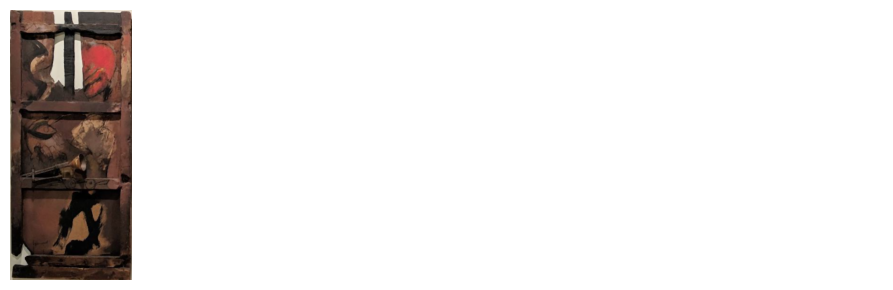

[[210, 32, 198, 85, 265]]


[[270, 47, 24, 36, 40]]


[[76, 142, 273, 103, 110]]


[[193, 265, 255, 12, 161]]


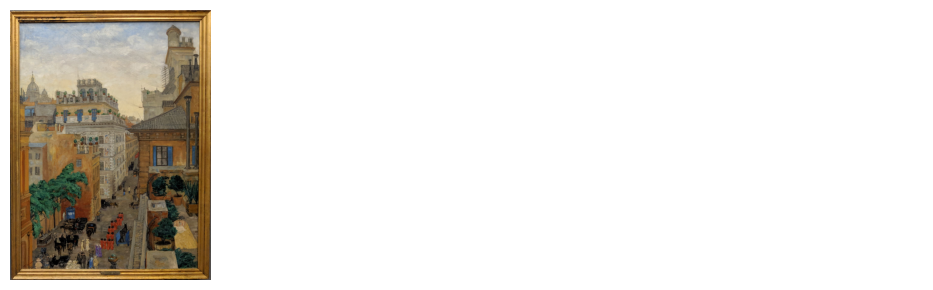

[[210, 259, 32, 109, 198], [221, 35, 48, 165, 25]]


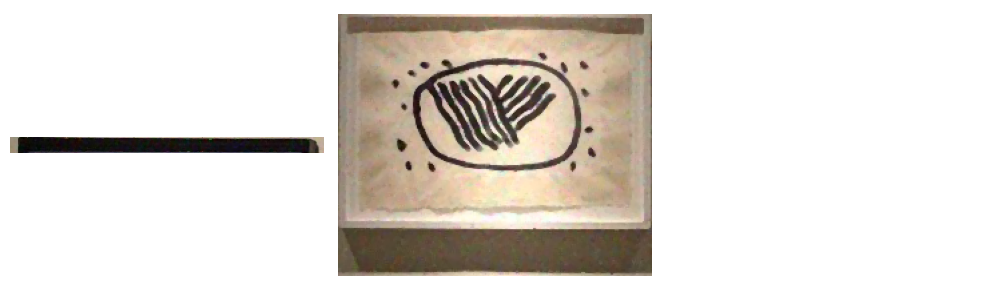

[[160, 58, 192, 239, 117]]


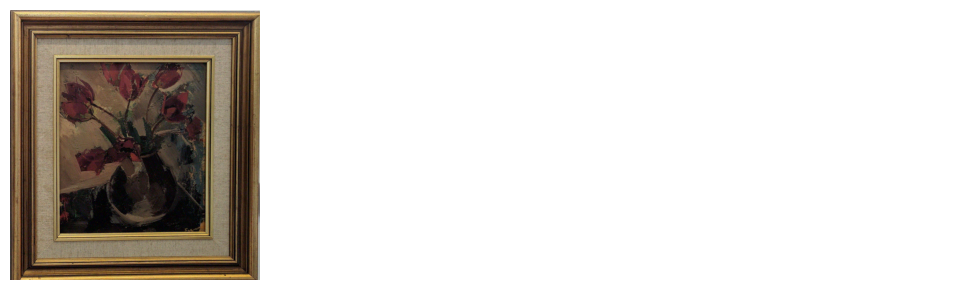

[[107, 30, 53, 74, 106]]


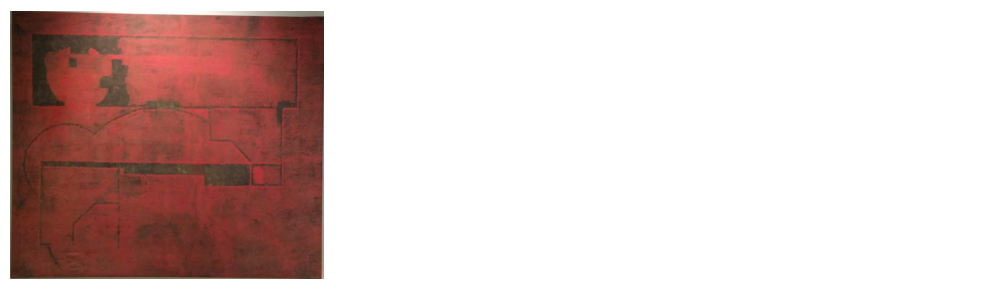

[[101, 248, 102, 279, 91], [22, 202, 212, 40, 258]]


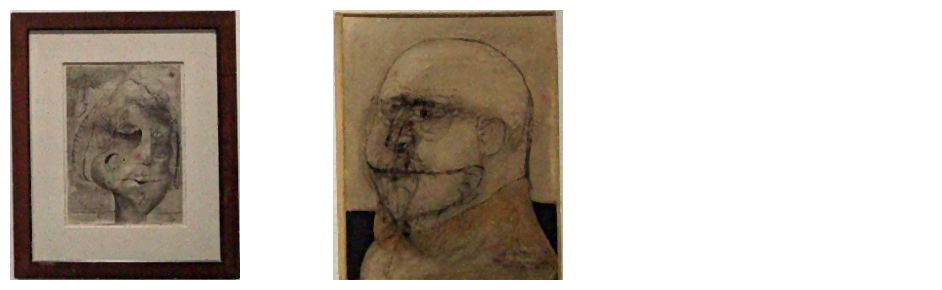

[[157, 57, 46, 43, 103], [108, 164, 201, 184, 6]]


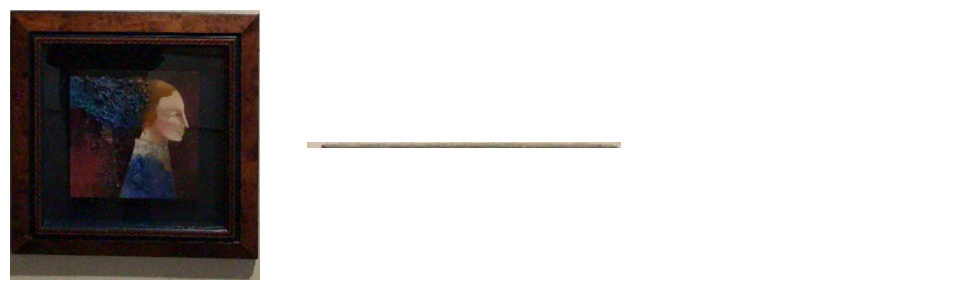

[[174, 232, 101, 135, 248]]


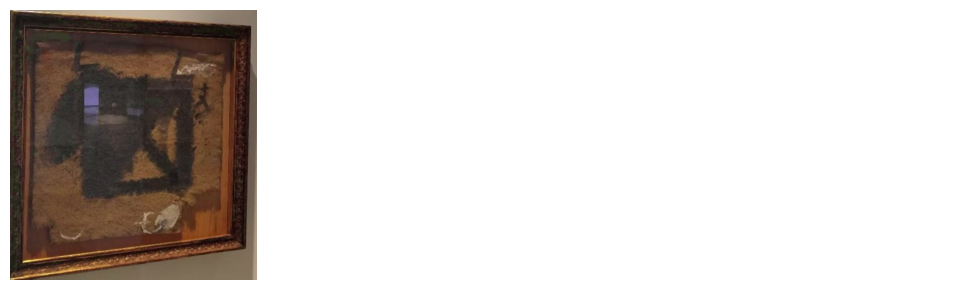

[[259, 160, 32, 192, 113]]


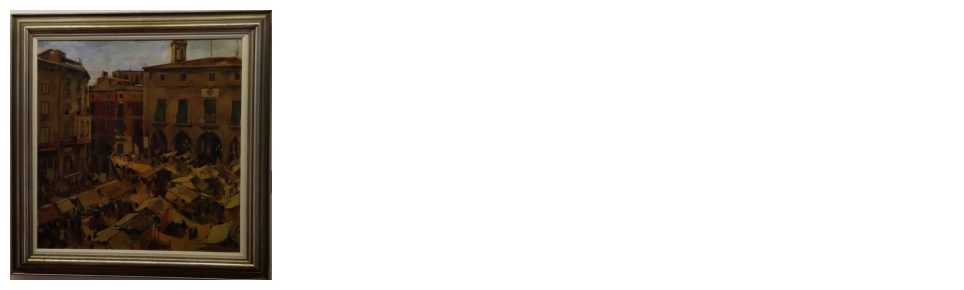

[[204, 165, 36, 6, 250], [179, 219, 155, 129, 218]]


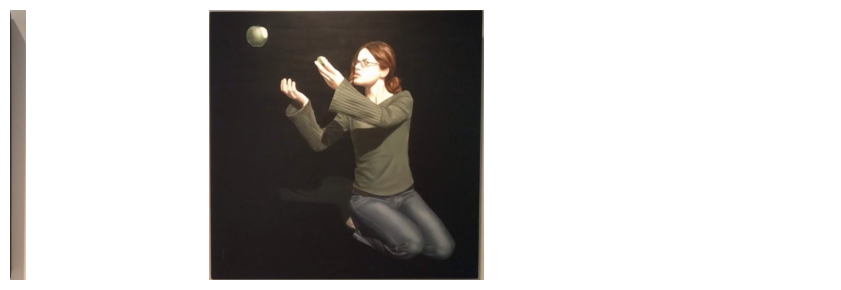

[[34, 104, 142, 144, 84]]


[[81, 163, 226, 205, 60]]


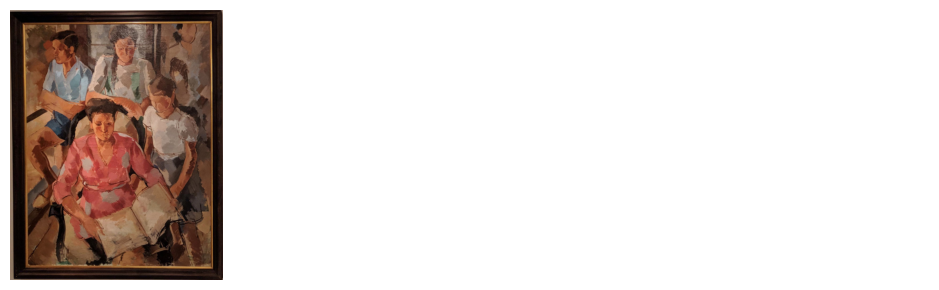

[[258, 94, 202, 212, 22]]


[[106, 148, 25, 165, 224]]


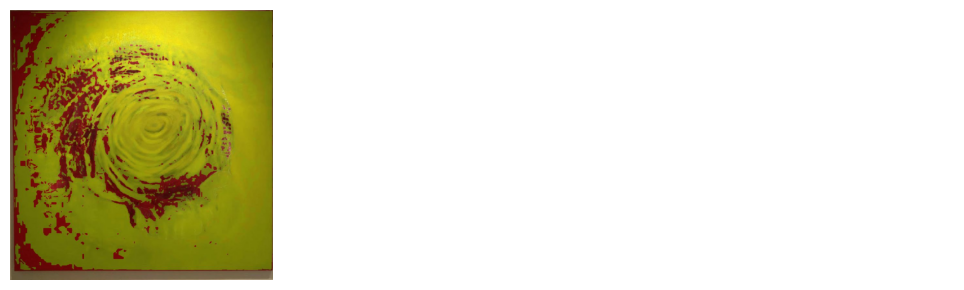

[[53, 54, 238, 107, 30]]


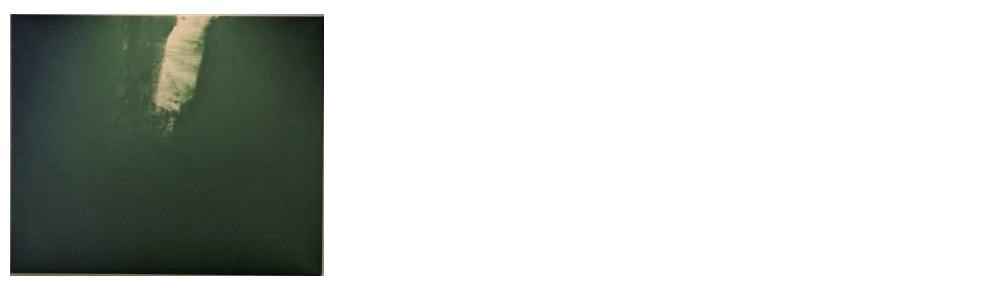

[[100, 5, 165, 236, 65]]


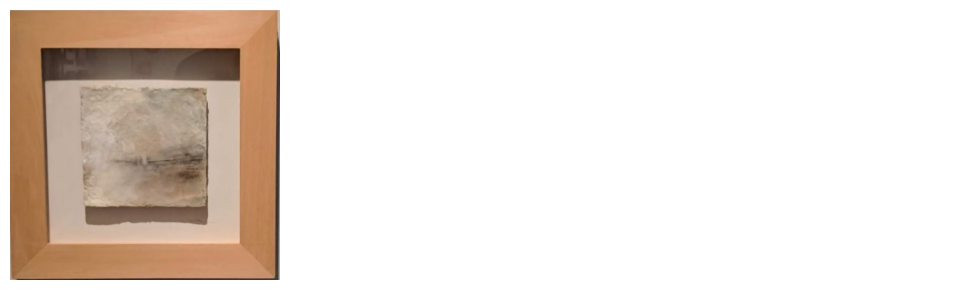

[[120, 36, 47, 221, 35], [252, 52, 60, 248, 102]]


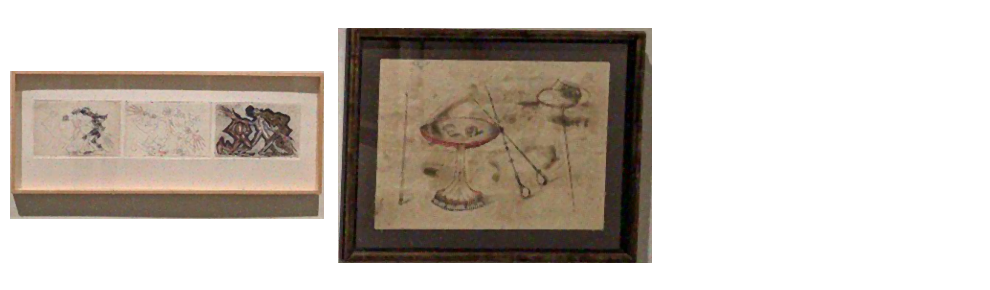

[[203, 61, 8, 144, 255]]


[[142, 76, 103, 150, 104]]


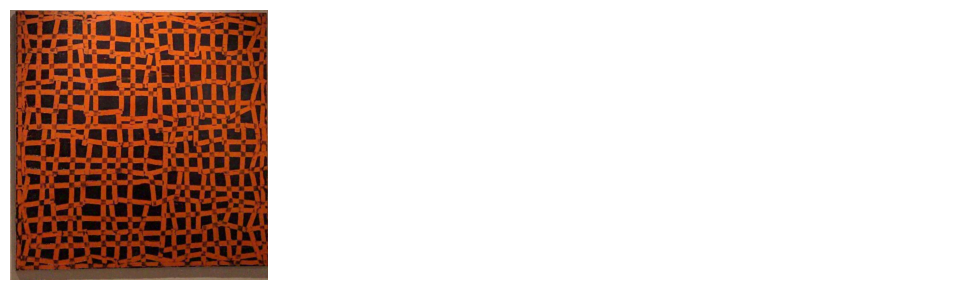

[[94, 192, 85, 191, 103], [132, 103, 255, 161, 70]]


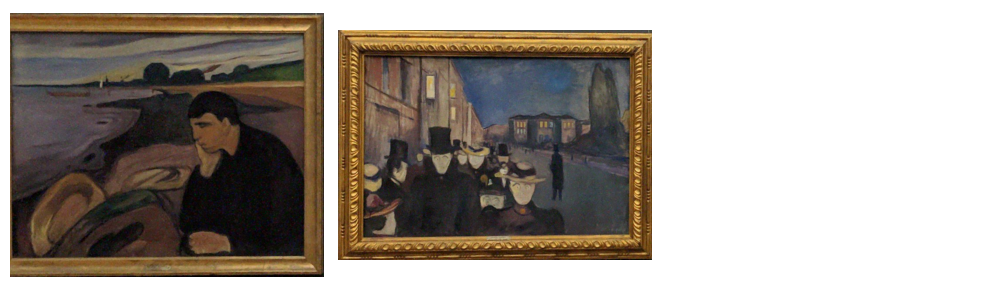

[[127, 92, 42, 130, 25], [131, 110, 37, 142, 93]]


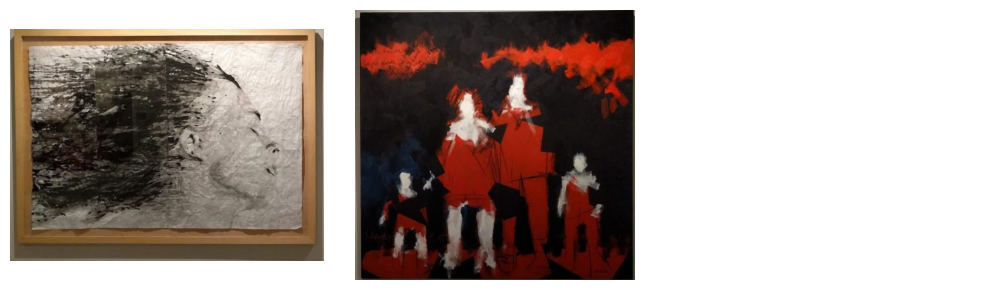

[[160, 170, 259, 118, 233]]


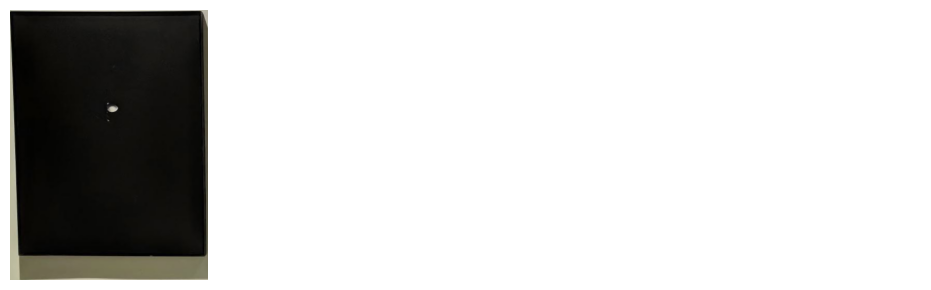

[[42, 258, 192, 239, 95], [248, 102, 101, 232, 174]]


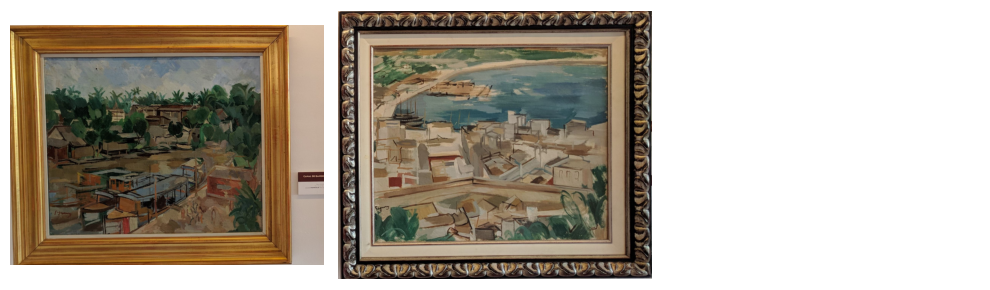

[[269, 184, 228, 92, 90]]


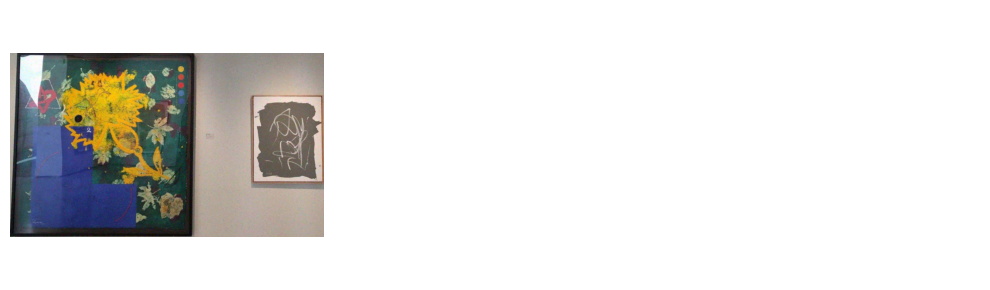

In [9]:
for paintings_image, retrieved_paintings in zip(cropped_query_image_list_t2, retrieved_images_t2):
    print(retrieved_paintings)
    show_images(paintings_image)